<a href="https://colab.research.google.com/github/LuisMig-code/Deteccao-de-carcer-de-mama-com-Machine-Learning/blob/main/Detec%C3%A7%C3%A3o_de_C%C3%A2ncer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning para detecção do Câncer de Mama

***A priori , gostaria de deixar claro que este artigo fora baseado em um outro produzido pelo [Carlos Melo](https://www.instagram.com/carlos_melo.py/) do [blog Sigmoidal](https://sigmoidal.ai/blog-sigmoidal/) , basicamente recliclei um pouco de seu código e aprofundei em outros aspectos , pode acessá-lo [clicando aqui](https://sigmoidal.ai/machine-learning-para-a-deteccao-de-cancer-de-mama/)***

O uso de *Machine Learning* (Aprendizado de Máquinas) na medicina vem [aumentando muito nos últimos anos](http://www.canceresaude.com.br/2019/05/google-mostra-como-o-aprendizado-de.html) , com algorítimos cada vez mais bem elaborados e máquinas cada vez mais potentes sendo empregados em muitos Institutos e Universidades, e com o Câncer não seria diferente.

O Câncer de Mama é o câncer mais comum no Brasil , de acordo com estatísticas , o mesmo representa quase [30% dos casos de novos cânceres em mulheres.](http://antigo.saude.gov.br/saude-de-a-z/cancer-de-mama)


<p align=center>
  <img src="https://images.pexels.com/photos/5482985/pexels-photo-5482985.jpeg?cs=srgb&dl=pexels-anna-tarazevich-5482985.jpg&fm=jpg" height = "450px">
</p>

<p>
Ainda não há cura para o Câncer , mas estudos na sua busca vem evoluindo cada vez mais . Entretanto , mesmo sem cura há tratamento , que em muitos casos leva a destruição do tumor, mas claro , isso quando feito um diagnóstico cedo.
</p>

## Importando os Dados:

Os dados usados neste Notebook foram extraidos do kaggle , você pode acessar neste link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data ou por este : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

De maneira geral teremos um *Dataset* com pouco mais de 569 entradas e 32 colunas , as quais são observações que foram obtidas por meio da aspiração com agulha fina de células da mama. Temos também uma coluna especial de diagnóstico 

In [ ]:
# importar os pacotes necessários
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
link_dados = "https://www.dropbox.com/s/9aock24gw1ki2jz/breast-cancer-wisconsin.csv?dl=1"
df = pd.read_csv(link_dados)

In [ ]:
# eliminar uma coluna com erro
df.drop('Unnamed: 32', axis=1, inplace=True)

## Análise Exploratória:

É importantes termos em mente que tipo de dado e qual a quantidade de dados que temos para começar a ter noções básicas do que será feito daqui pra frente

*   A coluna id representa o número de identificação.
*   A coluna diagnosis é a variável alvo , podendo ser :
   *  M - Maligno
   *  B - Benigno
*   A descrição completa para cada uma das features está disponível [neste link](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [ ]:
# dimensões do dataframe
print("Em nosso Dataframe temos:")
print("Linhas : {}".format(df.shape[0]))
print("Colunas : {}".format(df.shape[1]))

Em nosso Dataframe temos:
Linhas : 569
Colunas : 32


Vamos ver também as 5 primeiras entradas dos nossos dados a fim de saber com o que estamos trabalhando:

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Seria interessante se analisássemos também a correlação das variáveis e mais algumas informações dos nossos dados, isso é possível por meio do método corr() e também pelo método describe() , respectivamente

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Com relação a este último , quanto mais próximo a +1 , maior a correlação positiva ("diretamente proporcional"), quanto mais próximo a 0 mais podemos afirmar que não há correlação entre os dados , e por fim , quanto mais próximo a -1 maior é a correlação negativa ("inversamente proporcional")

Por último, vamos ver quais tipos de variáveis das colunas e se há algum valor nulo , este último é fundamental , visto que caso hajam valores nulos poderia haver algum viés ou erro em nosso modelo

In [ ]:
# ver tipo das variáveis
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# ver se há valores nulos:
df.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Análises Gráficas:

Apesar do objetivo deste Notebook ser o de criar um modelo de *Machine Learning* que promova melhores resultados na detecção do câncer de mama , é interessantes que analisássemos de forma gráfica algumas das nossas variáveis

Para começarmos , vamos *plotar* um gráfico que nos mostre as proporções de diagnóstico

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


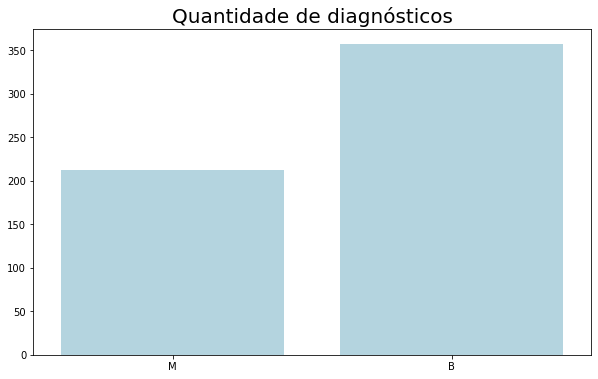

In [ ]:
# plotar o gráfico de barras com os diagnósticos
plt.figure(figsize=(10,6))
ax = sns.countplot('diagnosis', data=df , color = 'lightblue' )
ax.set_title("Quantidade de diagnósticos" , fontsize = 20 )
ax.set_xlabel("")
ax.set_ylabel("")
ax=ax
ax

Vamos também observar como as variáveis(features) se distribuem em nossos dados *plotando* um gráfico de distribuição para cada uma delas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


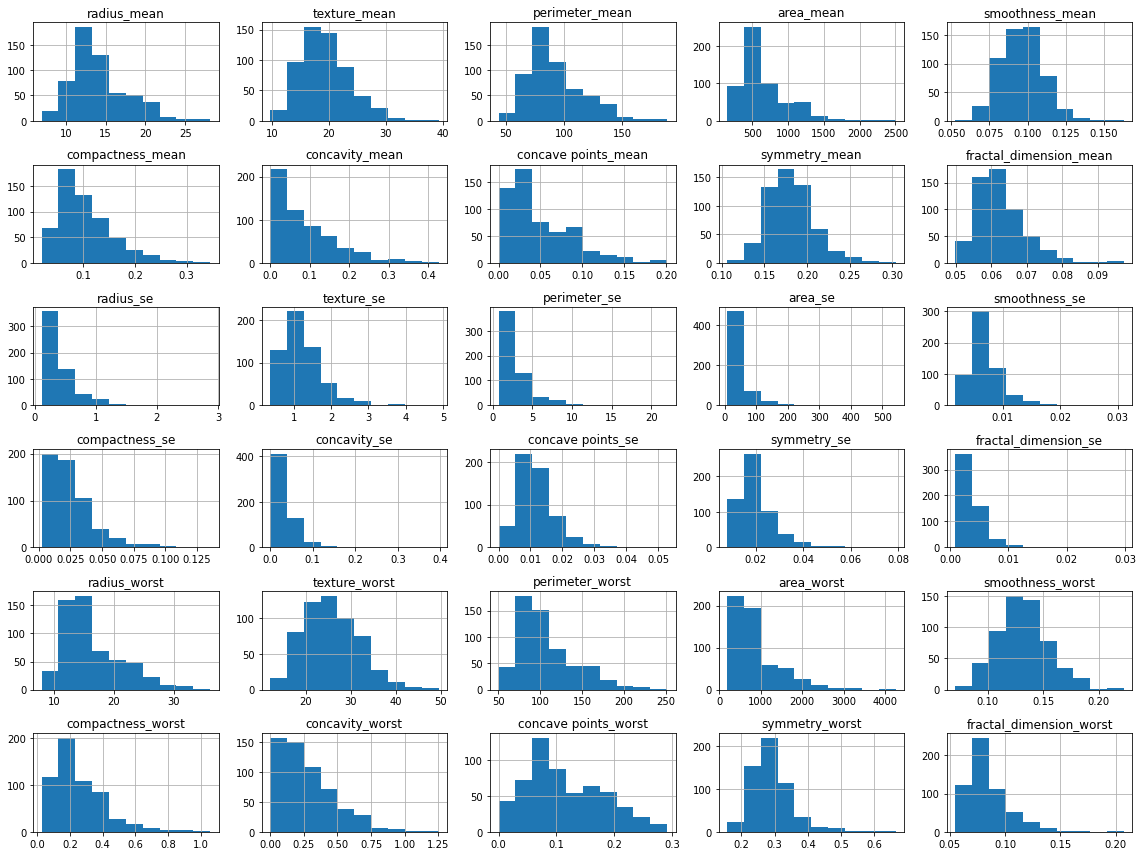

In [ ]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(16,12))
df.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

Por fim , vamos visualizar , novamente , a correlação de nossas variáveis mas dessa vez em um gráfico chamado de *heatmap* , com ele é possível analisar de forma mais clara tal correlação , brevemente 

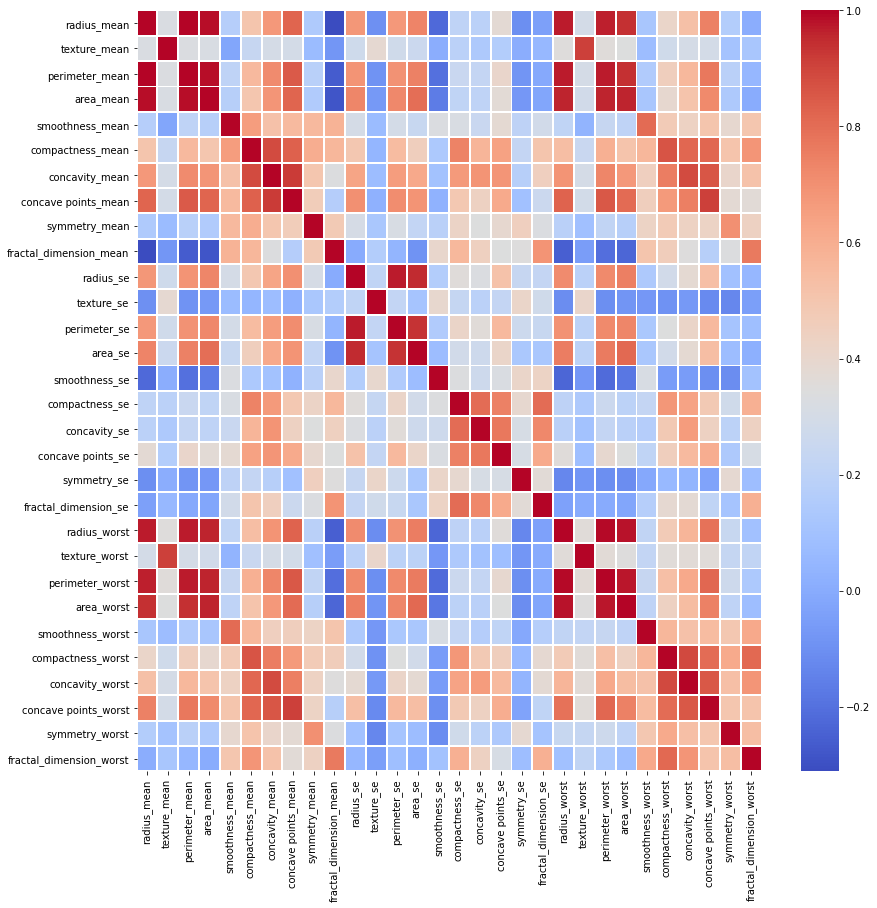

In [ ]:
# plotando o heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.drop('id', axis=1).corr(), cmap='coolwarm', ax=ax , linewidths=.9)
plt.show()

## Machine Learning 

### Preparando os dados

Para que possamos trabalhar com variáveis mais padrões , vamos usar o *StardardScaler* do *sklearn.preprocessing* de forma a escalar nossos dados. Vamos aproveitar para também separar nossos dados em dados de treino e dados de teste



In [ ]:
# definindo uma seed padrão
SEED = 301
np.random.seed(SEED)

In [ ]:
# separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,shuffle=True)

Além de usarmos o RFC (RandomForestClassifier) pretendo usar também o KFold e o CrossValidate de forma a melhorar e dar mais precisão na criação do modelo, pra tal , farei uma função que me retorne os dados impressos no CrossValidate

Antes disso, aqui vai uma explicação de como funcionam ambos os algorítimos : De maneira geral , quando se divide dados de treino e teste , em tese , ocorre um divisão aleatória(dependendo da seed ultilizada) , para o CrossValidate e KFold isso é feito , mas também se pode definir um numero de vezes que será repetido tal ato , ou seja , se quisermos que o haja um número N de "divisões" , ou numero N de vezes em que aleatorizamos nossos dados , podemo passá-lo como parãmetro ao nosso modelo, de forma a tirar qualquer viés do nosso modelo

In [ ]:
def imprime_resultado(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy medio : %.2f" % (media*100))
  print("Accuracy com cross validation(intervalo): %.2f %.2f" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao)*100))

### Modelo

A próxima etapa é a criação do nosso modelo

In [ ]:
# usando o KFold para fazer multiplas divisões nos dados de treino e teste
# usando o cross validate para fazer as validações e cruzar os dados

cv = StratifiedKFold(n_splits = 5 , shuffle=True)
modelo = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
results = cross_validate(modelo, X, y, cv = cv, return_train_score=False)
imprime_resultado(results)

Accuracy medio : 95.08
Accuracy com cross validation(intervalo): 92.43 97.72


O CrossValidate me retorna já um valor de acurácia média entre as diferentes acurácias dos 5 splits que defini como parâmetro

Vamos agora treinar nosso modelo e fazer previsões

In [ ]:
#treinando
modelo.fit(X_train,y_train)

#realizando previsões
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test,previsoes)

Por fim , vamos ver como ele se sai em nossos testes 

In [ ]:
# ver acurácia geral
print('[Acurácia] Random Forest:', acuracia)

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, previsoes) )

[Acurácia] Random Forest: 0.9766081871345029

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.97      0.97      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Conclusões :

Notamos que nosso modelo apresentou excelente resultados tanto para treino quanto para teste, com 95% e 97% de taxa de acerto para dados de treino e teste. Além disso vimos que a precisão dele para detectar se era B ou M  fora de 98% e 97%. 

Para um algorítimo que visa fins médico fomos bem , é evidente que essa porcentagem restante para o 100% faz diferença , mas por hora foi um ótimo resultado, com nosso algorítimo lidando muito bem com as diferentes classes